In [93]:
# -*- coding: utf-8 -*-
%pylab inline

import pandas as pd

from methods import *
from results import *

methods = [dicho_freq, letter_dicho_freq, letter_ejasint_freq, letter_clignement_freq, letter_keyboard_freq, letter_sep1_freq, letter_sep2_freq]

Populating the interactive namespace from numpy and matplotlib


In [94]:
# resolution
res = 50
N = 0

xlabel = ""
ylabel = "Taux de reussite"
title = ''
label_size = 20
xticks_size = 20
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    


font = {'family' : 'normal',
#    'weight' : 'normal',
    'size'   : 18}

matplotlib.rc('font', **font)
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)


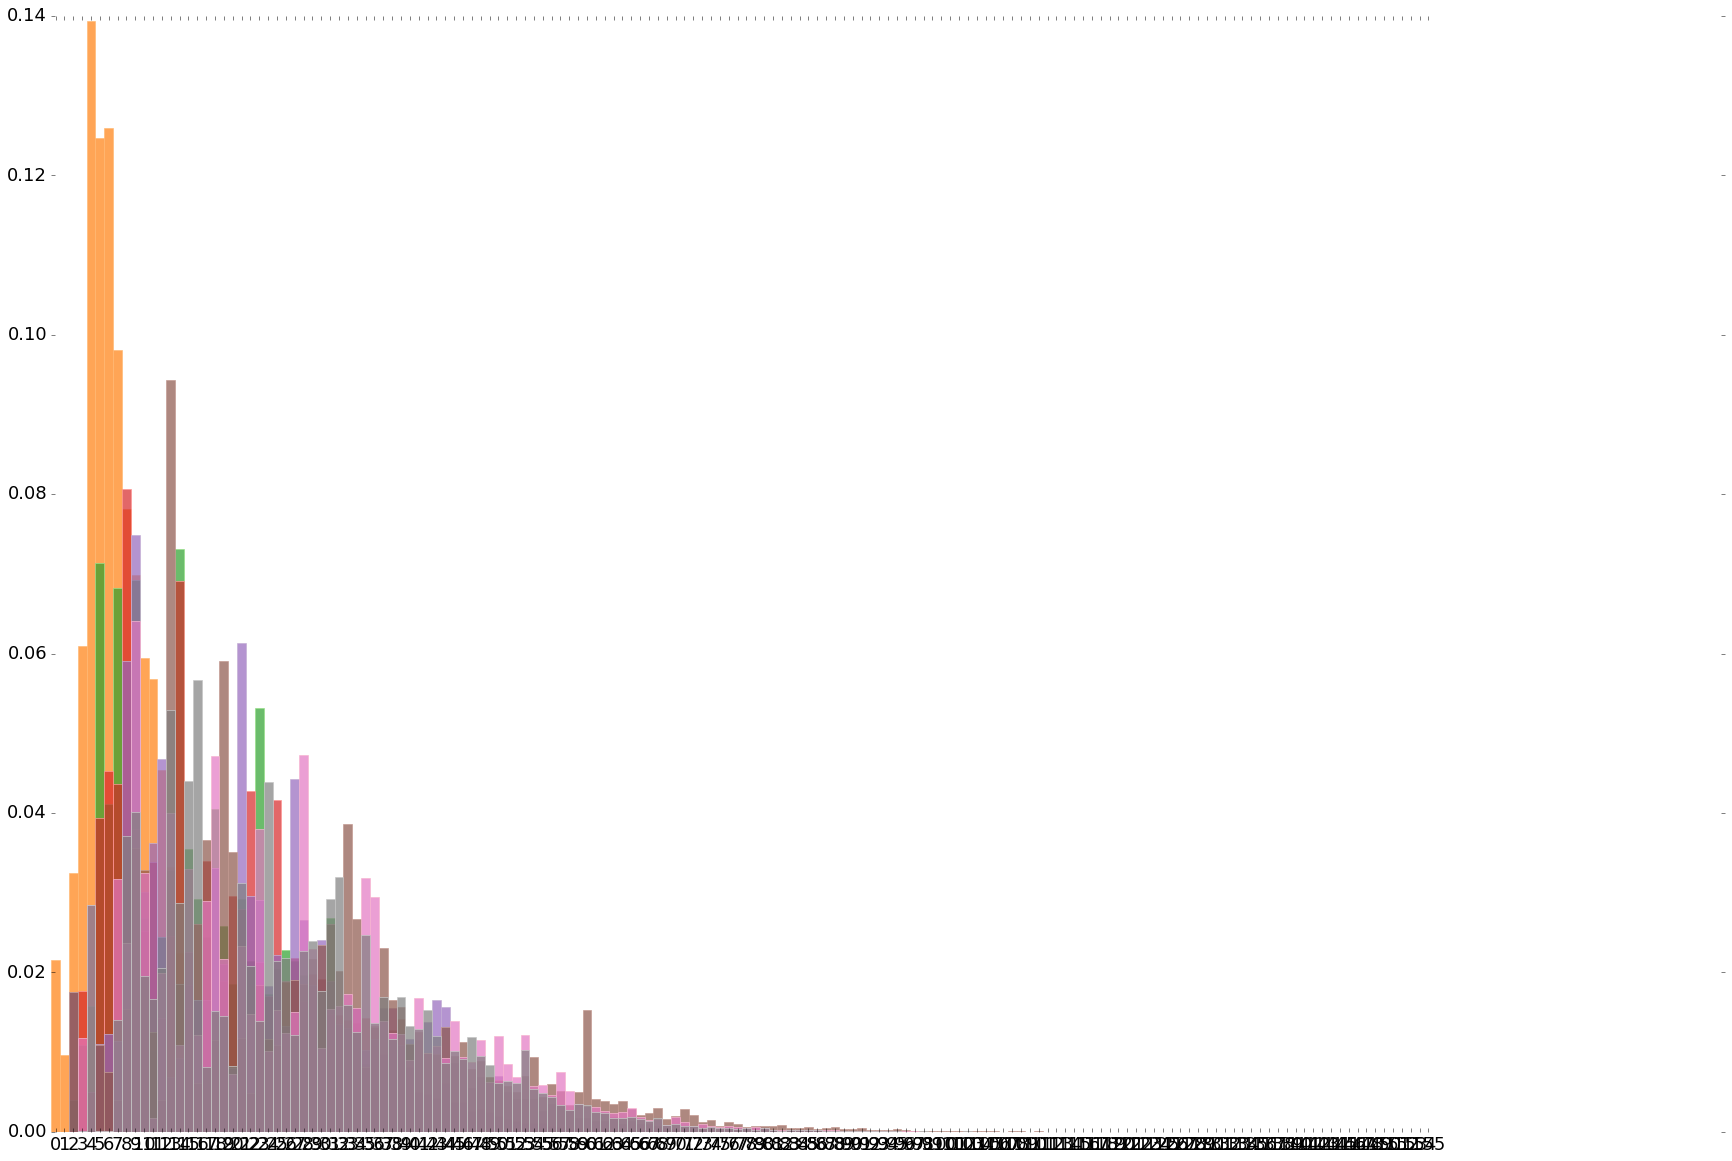

In [112]:
i=0
plt.figure(figsize=(30,20))
for frequencies in methods:
    i+=2
    pos = np.arange(len(frequencies))
    width = 1.0     # gives histogram aspect to the bar diagram

    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(pos)

    # Remove the plot frame lines. They are unnecessary chartjunk.  
    ax = plt.subplot(111)  
    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)
    
    plt.bar(pos, frequencies, width, color=tableau20[i], edgecolor=tableau20[i+1], alpha=0.7)
plt.show()


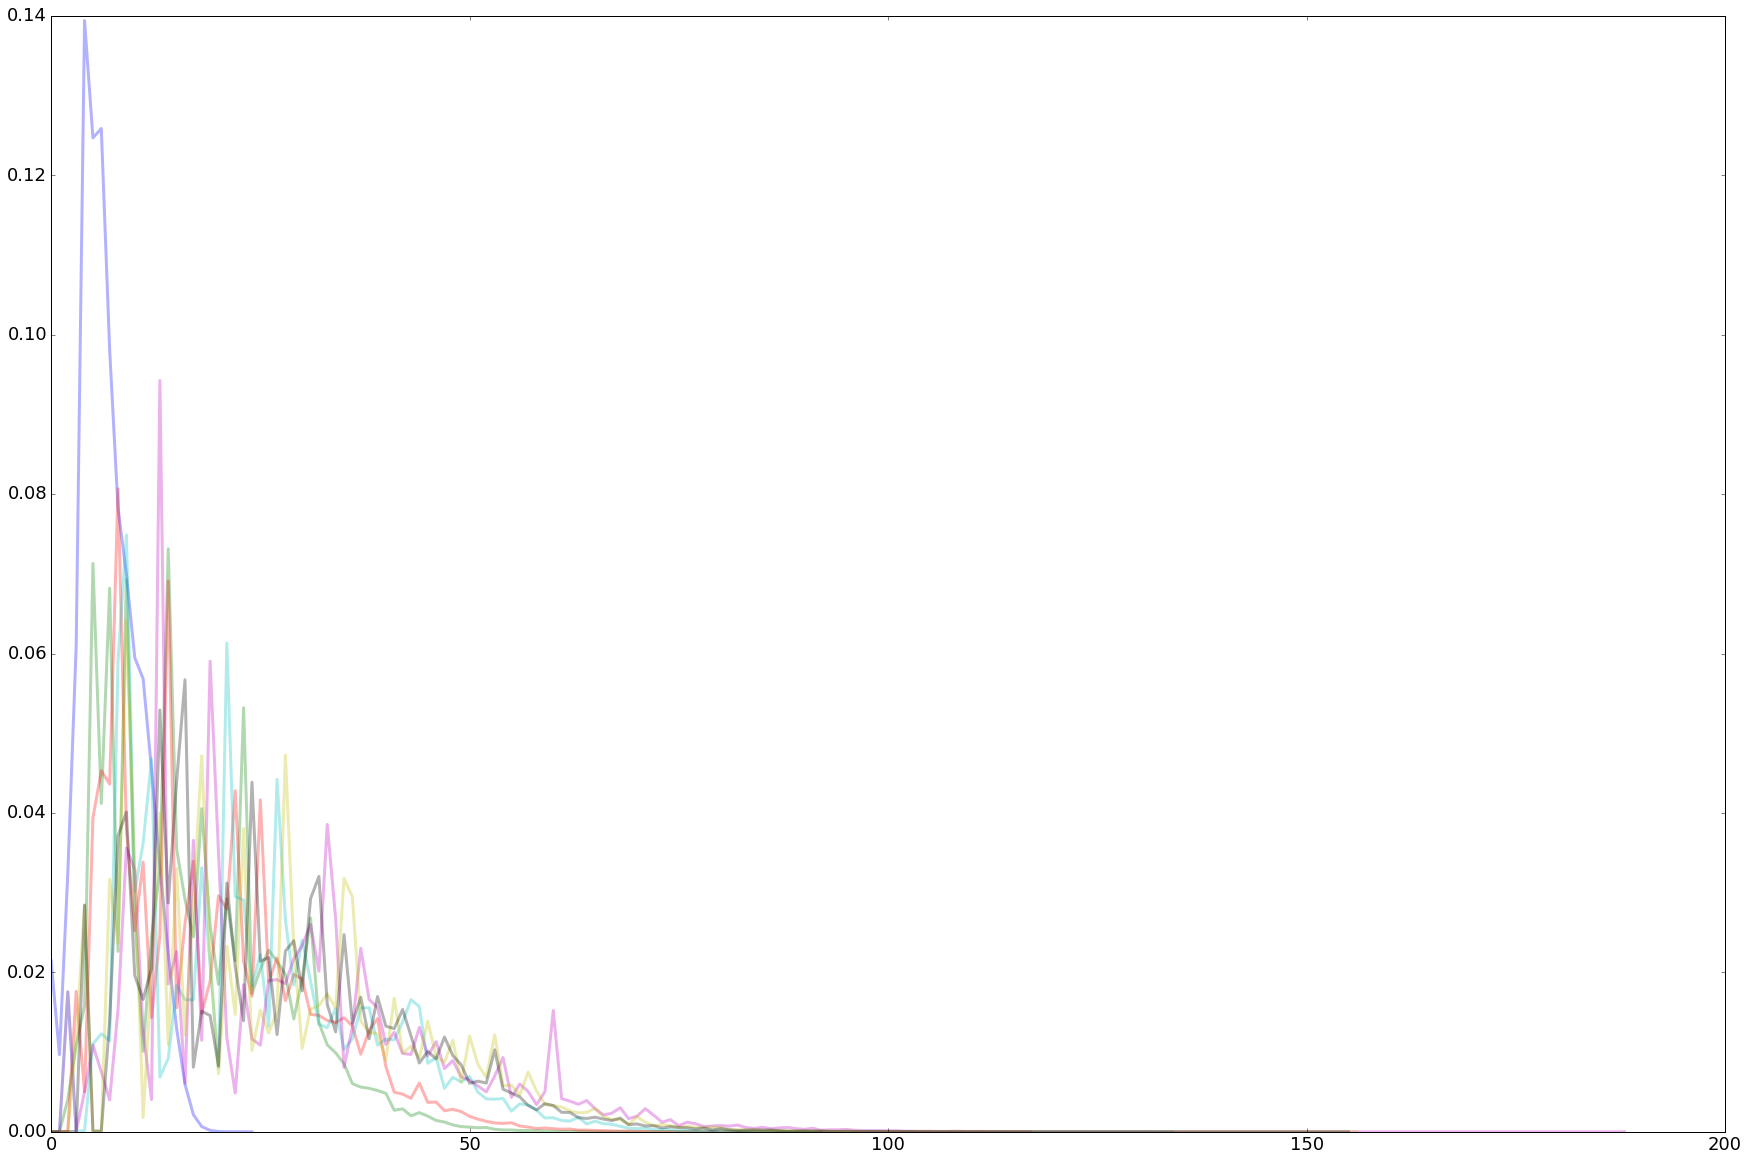

In [117]:
plt.figure(figsize=(30,20))
for frequencies in methods:
    plt.plot([i for i in range(len(frequencies))], frequencies, linewidth = 3, alpha = 0.3)
plt.show()

[6.987496464821413, 17.243595637114755, 19.351748351223097, 24.004195686880543, 28.45183142433613, 26.897530967472697, 26.38805476842061]


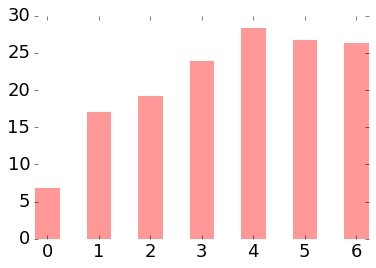

In [102]:
means = [0] * len(methods)
for i in range(len(methods)):
    for j in range(len(methods[i])):
        means[i] += j * methods[i][j]
print means

pos = np.arange(len(means))
width = 0.5     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(pos)

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)

plt.bar(pos, means, width, color=tableau20[7], edgecolor='white')
plt.show()